# [Tarea 07] Unidad 03-B | splines cúbicos


#### realizado por : CORREA A. FRANCISCO A.

# 1. Dados los puntos $(0,1)$, $(1,5)$, $(2,3)$, determine el spline cúbico.

Ecuaciones del spline cúbico por tramos:
Tramo 1 (0 <= x <= 1):
f(x) = 1 + 5.5 * (x - 0) + 0.0 * (x - 0)**2 + -1.5 * (x - 0)**3
Tramo 2 (1 <= x <= 2):
f(x) = 5 + 1.0 * (x - 1) + -4.5 * (x - 1)**2 + 1.5 * (x - 1)**3


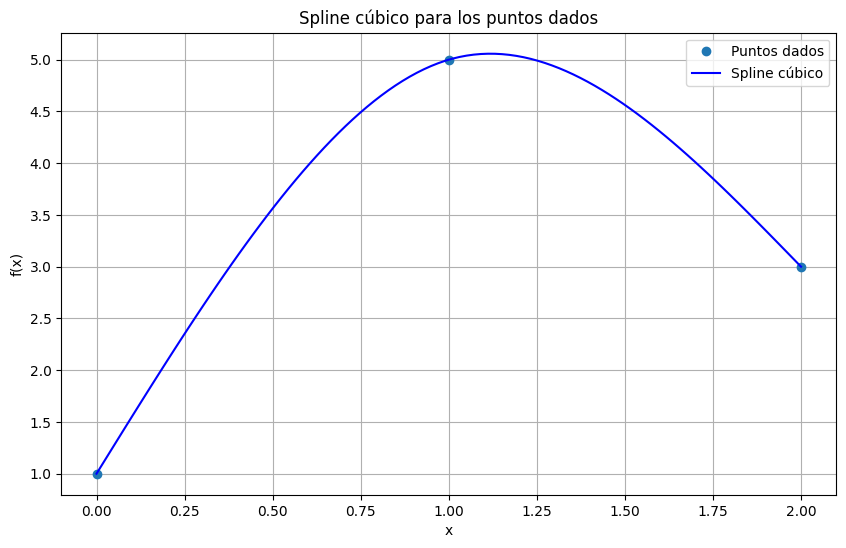

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x_points = [0, 1, 2]
y_points = [1, 5, 3]

# Cálculo  del spline cúbico 
def cubic_spline(x_points, y_points, x_vals):
    n = len(x_points)
    A = np.zeros((n, n))
    b = np.zeros(n)
    
    for i in range(1, n - 1):
        A[i, i - 1] = x_points[i] - x_points[i - 1]
        A[i, i] = 2 * (x_points[i + 1] - x_points[i - 1])
        A[i, i + 1] = x_points[i + 1] - x_points[i]
        b[i] = 3 * ((y_points[i + 1] - y_points[i]) / (x_points[i + 1] - x_points[i]) - (y_points[i] - y_points[i - 1]) / (x_points[i] - x_points[i - 1]))

    
    A[0, 0] = 1
    A[n - 1, n - 1] = 1

    
    c = np.linalg.solve(A, b)

    b_coeffs = np.zeros(n - 1)
    d_coeffs = np.zeros(n - 1)
    a_coeffs = y_points[:-1]

    for i in range(n - 1):
        b_coeffs[i] = (y_points[i + 1] - y_points[i]) / (x_points[i + 1] - x_points[i]) - (x_points[i + 1] - x_points[i]) * (2 * c[i] + c[i + 1]) / 3
        d_coeffs[i] = (c[i + 1] - c[i]) / (3 * (x_points[i + 1] - x_points[i]))

    # Evaluar el spline en los puntos dados
    y_vals = np.zeros_like(x_vals)
    for i in range(n - 1):
        idx = (x_vals >= x_points[i]) & (x_vals <= x_points[i + 1])
        y_vals[idx] = (a_coeffs[i] + b_coeffs[i] * (x_vals[idx] - x_points[i]) +
                       c[i] * (x_vals[idx] - x_points[i])**2 +
                       d_coeffs[i] * (x_vals[idx] - x_points[i])**3)
    return y_vals, a_coeffs, b_coeffs, c, d_coeffs

# Calcular el spline cúbico
x_vals = np.linspace(0, 2, 100)
y_vals, a_coeffs, b_coeffs, c, d_coeffs = cubic_spline(x_points, y_points, x_vals)

# Coeficientes del spline cúbico
print("Ecuaciones del spline cúbico por tramos:")
for i in range(len(x_points) - 1):
    print(f"Tramo {i + 1} ({x_points[i]} <= x <= {x_points[i + 1]}):")
    print(f"f(x) = {a_coeffs[i]} + {b_coeffs[i]} * (x - {x_points[i]}) + {c[i]} * (x - {x_points[i]})**2 + {d_coeffs[i]} * (x - {x_points[i]})**3")

# Gráfica del spline cúbico
plt.figure(figsize=(10, 6))
plt.plot(x_points, y_points, 'o', label='Puntos dados')
plt.plot(x_vals, y_vals, label='Spline cúbico', linestyle='-', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Spline cúbico para los puntos dados')
plt.legend()
plt.grid()
plt.show()


# 2. Dados los puntos $(-1, 1)$, $(1, 3)$, determine el spline cúbico sabiendo que $f'(x_0) = 1$, $f'(x_n) = 2$.


Ecuaciones del spline cúbico por tramos:
Tramo 1 (-1 <= x <= 1):
f(x) = 1 + 1.0 * (x - -1) + -0.5 * (x - -1)**2 + 0.25 * (x - -1)**3


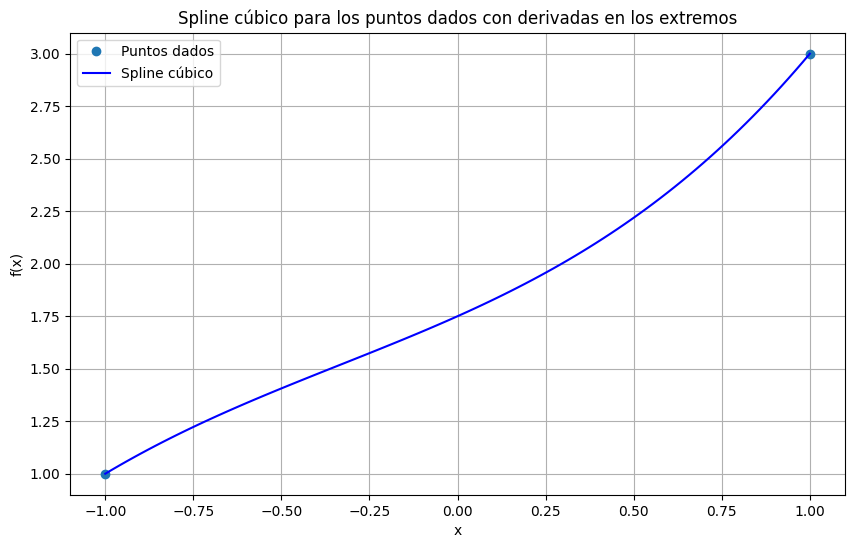

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x_points = [-1, 1]
y_points = [1, 3]
# Derivadas en los puntos
f_prime_0 = 1
f_prime_n = 2

# Cálculo del spline cúbico con derivadas en los extremos
def cubic_spline_with_derivatives(x_points, y_points, x_vals, f_prime_0, f_prime_n):
    n = len(x_points)
    A = np.zeros((n, n))
    b = np.zeros(n)

    # coeficientes del spline
    for i in range(1, n - 1):
        A[i, i - 1] = x_points[i] - x_points[i - 1]
        A[i, i] = 2 * (x_points[i + 1] - x_points[i - 1])
        A[i, i + 1] = x_points[i + 1] - x_points[i]
        b[i] = 3 * ((y_points[i + 1] - y_points[i]) / (x_points[i + 1] - x_points[i]) - (y_points[i] - y_points[i - 1]) / (x_points[i] - x_points[i - 1]))

    
    A[0, 0] = 2 * (x_points[1] - x_points[0])
    A[0, 1] = x_points[1] - x_points[0]
    b[0] = 3 * ((y_points[1] - y_points[0]) / (x_points[1] - x_points[0]) - f_prime_0)

    A[n - 1, n - 2] = x_points[n - 1] - x_points[n - 2]
    A[n - 1, n - 1] = 2 * (x_points[n - 1] - x_points[n - 2])
    b[n - 1] = 3 * (f_prime_n - (y_points[n - 1] - y_points[n - 2]) / (x_points[n - 1] - x_points[n - 2]))

    # Resolver el sistema lineal 
    c = np.linalg.solve(A, b)

    # Calcular los coeficientes b y d
    b_coeffs = np.zeros(n - 1)
    d_coeffs = np.zeros(n - 1)
    a_coeffs = y_points[:-1]

    for i in range(n - 1):
        b_coeffs[i] = (y_points[i + 1] - y_points[i]) / (x_points[i + 1] - x_points[i]) - (x_points[i + 1] - x_points[i]) * (2 * c[i] + c[i + 1]) / 3
        d_coeffs[i] = (c[i + 1] - c[i]) / (3 * (x_points[i + 1] - x_points[i]))

    # Evaluar el spline en los puntos dados
    y_vals = np.zeros_like(x_vals)
    for i in range(n - 1):
        idx = (x_vals >= x_points[i]) & (x_vals <= x_points[i + 1])
        y_vals[idx] = (a_coeffs[i] + b_coeffs[i] * (x_vals[idx] - x_points[i]) +
                       c[i] * (x_vals[idx] - x_points[i])**2 +
                       d_coeffs[i] * (x_vals[idx] - x_points[i])**3)
    return y_vals, a_coeffs, b_coeffs, c, d_coeffs

# Calcular el spline cúbico
x_vals = np.linspace(-1, 1, 100)
y_vals, a_coeffs, b_coeffs, c, d_coeffs = cubic_spline_with_derivatives(x_points, y_points, x_vals, f_prime_0, f_prime_n)

# Coeficientes del spline cúbico
print("Ecuaciones del spline cúbico por tramos:")
for i in range(len(x_points) - 1):
    print(f"Tramo {i + 1} ({x_points[i]} <= x <= {x_points[i + 1]}):")
    print(f"f(x) = {a_coeffs[i]} + {b_coeffs[i]} * (x - {x_points[i]}) + {c[i]} * (x - {x_points[i]})**2 + {d_coeffs[i]} * (x - {x_points[i]})**3")

# Gráfica del spline cúbico
plt.figure(figsize=(10, 6))
plt.plot(x_points, y_points, 'o', label='Puntos dados')
plt.plot(x_vals, y_vals, label='Spline cúbico', linestyle='-', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Spline cúbico para los puntos dados con derivadas en los extremos')
plt.legend()
plt.grid()
plt.show()


## 3. Diríjase al pseudocódigo del spline cúbico con frontera natural provisto en clase, en 
##    base a ese pseudocódigo complete la siguiente función:

In [13]:
import numpy as np

# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of cubic spline coefficients for each interval.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    # Cálculo de alpha
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = (a, b, c[j], d)
        splines.append(S)

    splines.reverse()
    return splines

# Ejemplo de uso
def main():
    xs = [-1, 0, 1]
    ys = [1, 0, 3]
    splines = cubic_spline(xs, ys)
    for i, (a, b, c, d) in enumerate(splines):
        print(f"Spline {i}: f(x) = {a} + {b}*(x - {xs[i]}) + {c}*(x - {xs[i]})**2 + {d}*(x - {xs[i]})**3")

if __name__ == "__main__":
    main()


Spline 0: f(x) = 1 + -2.0*(x - -1) + 0.0*(x - -1)**2 + 1.0*(x - -1)**3
Spline 1: f(x) = 0 + 1.0*(x - 0) + 3.0*(x - 0)**2 + -1.0*(x - 0)**3


## 4. Usando la función anterior, encuentre el spline cúbico para:

###   xs = [1, 2, 3]
###    ys = [2, 3, 5]

In [14]:
import numpy as np

def cubic_spline(xs: list[float], ys: list[float]) -> list:
  
    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    # Cálculo de alpha
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = (a, b, c[j], d)
        splines.append(S)

    splines.reverse()
    return splines

# Ejemplo de uso
def main():
    xs = [1, 2, 3]
    ys = [2, 3, 5]
    splines = cubic_spline(xs, ys)
    for i, (a, b, c, d) in enumerate(splines):
        print(f"Spline {i}: f(x) = {a} + {b}*(x - {xs[i]}) + {c}*(x - {xs[i]})**2 + {d}*(x - {xs[i]})**3")

if __name__ == "__main__":
    main()


Spline 0: f(x) = 2 + 0.75*(x - 1) + 0.0*(x - 1)**2 + 0.25*(x - 1)**3
Spline 1: f(x) = 3 + 1.5*(x - 2) + 0.75*(x - 2)**2 + -0.25*(x - 2)**3


## 5. Usando la función anterior, encuentre el spline cúbico para:

###    xs = [0, 1, 2, 3]
###  ys = [-1, 1, 5, 2]

In [15]:
import numpy as np


def cubic_spline(xs: list[float], ys: list[float]) -> list:
   

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    # Cálculo de alpha
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = (a, b, c[j], d)
        splines.append(S)

    splines.reverse()
    return splines

# Ejemplo de uso
def main():
    xs = [0, 1, 2, 3]
    ys = [-1, 1, 5, 2]
    splines = cubic_spline(xs, ys)
    for i, (a, b, c, d) in enumerate(splines):
        print(f"Spline {i}: f(x) = {a} + {b}*(x - {xs[i]}) + {c}*(x - {xs[i]})**2 + {d}*(x - {xs[i]})**3")

if __name__ == "__main__":
    main()


Spline 0: f(x) = -1 + 1.0*(x - 0) + 0.0*(x - 0)**2 + 1.0*(x - 0)**3
Spline 1: f(x) = 1 + 4.0*(x - 1) + 3.0*(x - 1)**2 + -3.0*(x - 1)**3
Spline 2: f(x) = 5 + 1.0*(x - 2) + -6.0*(x - 2)**2 + 2.0*(x - 2)**3


6. Use la función `cubic_spline_clamped`, provista en el enlace de Github, para graficar 
#    los datos de la siguiente tabla.
# 
#    ![Tabla de Datos](tabla_datos.png)

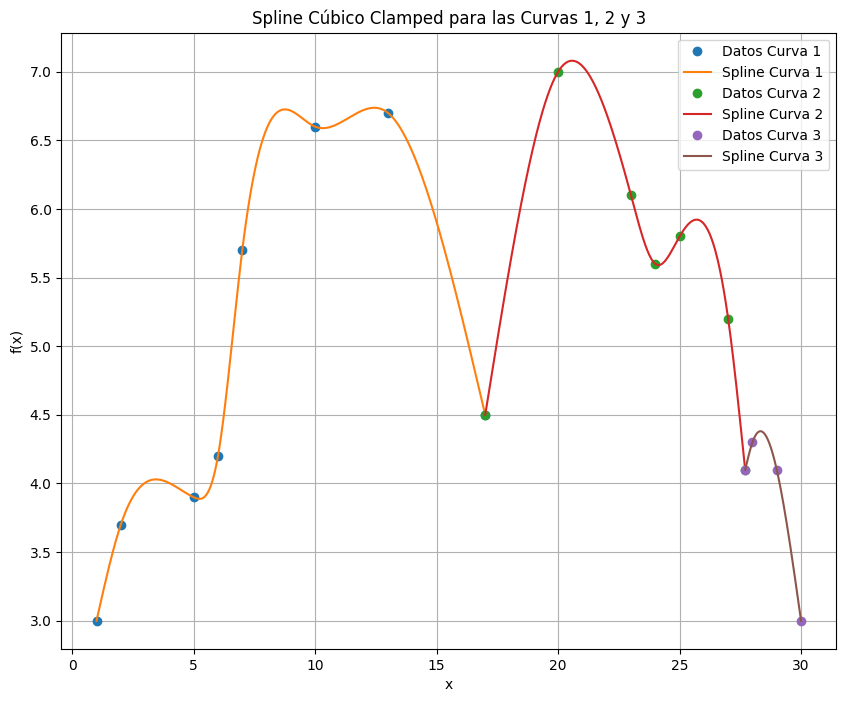

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def cubic_spline_clamped(xs, ys, fpa, fpb):

    n = len(xs) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * (n + 1)
    alpha[0] = 3 * (ys[1] - ys[0]) / h[0] - 3 * fpa
    alpha[n] = 3 * fpb - 3 * (ys[n] - ys[n - 1]) / h[n - 1]

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1] + [0] * n
    mu = [0] * (n + 1)
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n] = 1
    z[n] = 0
    c = [0] * (n + 1)
    b = [0] * n
    d = [0] * n
    a = ys[:n]

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - mu[j] * c[j + 1]
        b[j] = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])

    splines = [(a[i], b[i], c[i], d[i]) for i in range(n)]
    return splines

# Datos de la tabla para las tres curvas
curva_1 = {
    'xs': [1, 2, 5, 6, 7, 10, 13, 17],
    'ys': [3.0, 3.7, 3.9, 4.2, 5.7, 6.6, 6.7, 4.5],
    'fpa': 1.0,
    'fpb': -0.67
}

curva_2 = {
    'xs': [17, 20, 23, 24, 25, 27, 27.7],
    'ys': [4.5, 7.0, 6.1, 5.6, 5.8, 5.2, 4.1],
    'fpa': 3.0,
    'fpb': -4.0
}

curva_3 = {
    'xs': [27.7, 28, 29, 30],
    'ys': [4.1, 4.3, 4.1, 3.0],
    'fpa': 0.33,
    'fpb': -1.5
}

# Función para graficar el spline cúbico
def graficar_spline(xs, ys, splines, label):
    x_vals = np.linspace(xs[0], xs[-1], 500)
    y_vals = []

    for x in x_vals:
        for i in range(len(xs) - 1):
            if xs[i] <= x <= xs[i + 1]:
                a, b, c, d = splines[i]
                y = a + b * (x - xs[i]) + c * (x - xs[i])**2 + d * (x - xs[i])**3
                y_vals.append(y)
                break

    plt.plot(xs, ys, 'o', label=f'Datos {label}')
    plt.plot(x_vals, y_vals, label=f'Spline {label}')

# Calcular y graficar los splines para cada curva
def main():
    plt.figure(figsize=(10, 8))

    for i, curva in enumerate([curva_1, curva_2, curva_3], start=1):
        splines = cubic_spline_clamped(curva['xs'], curva['ys'], curva['fpa'], curva['fpb'])
        graficar_spline(curva['xs'], curva['ys'], splines, f'Curva {i}')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Spline Cúbico Clamped para las Curvas 1, 2 y 3')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()
